# Taller 1

##### MINE-4101: Applied Data Science
##### Universidad de los Andes

##### Dataset: Hotel Bookings

**Miguel Benavides Lara**   

**Santiago Palacios Loaiza**

### Importación de librerías y condiciones de operación de Pandas

In [65]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#from ydata_profiling import ProfileReport

from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [66]:
# Pandas configuration to extend the number of rows and columns to visualize by default
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [67]:
# Loading the CSV file as a dataframe
hotels_df = pd.read_csv('./hotel_bookings_modified.csv')

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\2563014795.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  hotels_df = pd.read_csv('./hotel_bookings_modified.csv')


### Primer punto: Descripción del dataset y estudio de variables

#### Estudio preliminar del dataset

In [68]:
# Dataframe dimensions
print('Number of rows: '+str(hotels_df.shape[0]))
print('Number of columns: '+str(hotels_df.shape[1]))

# Dataframe columns
print(hotels_df.dtypes)
hotels_df.sample(5)

Number of rows: 58895
Number of columns: 33
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                    

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
1804,Resort Hotel,0,119,2015.00,September,38,15,4,10,2,0.00,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,142.00,NaN,0.00,Transient,71.66,0.00,0.00,Check-Out,2015-09-29,NaN
32994,Resort Hotel,0,112,2017.00,February,6,5,2,5,2,0.00,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,241.00,NaN,0.00,Transient,54.02,1.00,1.00,Check-Out,2017-02-12,NaN
56115,City Hotel,1,65,2016.00,August,36,29,1,3,3,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,NaN,0.00,Transient,159.30,0.00,0.00,Canceled,2016-07-01,NaN
146,Resort Hotel,0,39,2015.00,July,28,5,2,4,2,0.00,0,BB,ESP,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,240.00,NaN,0.00,Transient,163.00,0.00,0.00,Check-Out,2015-07-11,NaN
12092,Resort Hotel,1,298,2017.00,June,24,12,3,7,2,0.00,0,BB,IRL,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.00,NaN,0.00,Transient,107.10,0.00,0.00,Canceled,2016-08-18,NaN


Se encuentra un dataset con 33 columnas que muestra datos de registros correspondientes a reservas hoteleras. Dentro del dataset se identifican valores de interés, principalmente si la reserva fue cancelada o no, detalles de fecha de la reserva, responsable de realizar la reserva, adultos, niños y bebés correspondiente a la reserva. También se identifican valores como el valor de la reserva en función de los días reservados

#### Estudio de cinco (5) variables seleccionadas
Para el estudio de variables, se escogieron las siguientes:
- Hotel: Para poder entender la distribución de los datos frente a los dos tipos de hoteles
- Is canceled: Buscando entender características de las reservas que fueron canceladas
- Lead time: Distribución típica de tiempos de reserva
- Guests: variable creada que agrupa adultos, niños y bebés en las reservas; Es decir la cantidad de huespedes en la reserva
- ADR: Costo por noche de la reserva realizada

##### Variable 1: Hotel

Se encontraron dos posibles valores para la variable hotel: Resort Hotel y City Hotel, en donde las proporciones de participación de cada una rondan los 68% y 32% respectivamente

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\1033288120.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\1033288120.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  barplot = sns.barplot(


<Figure size 800x500 with 0 Axes>

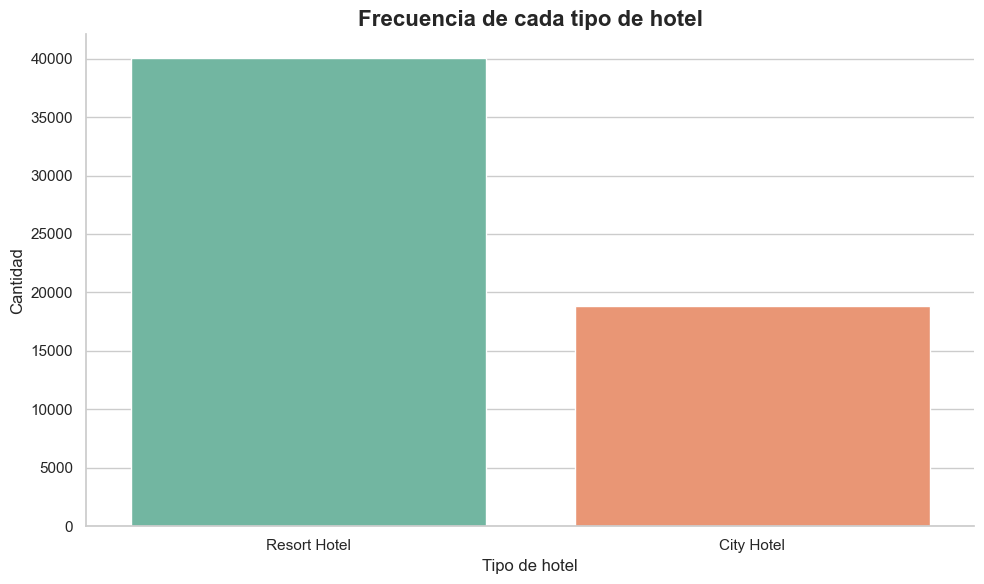

In [69]:
#Hotel
hotels_df["hotel"].unique() # Only two values, same from dict. Data is clean in this column
hotels_df["hotel"].value_counts(dropna=False) # 62% are resorts, 32% are city hotels
# Estilo general
sns.set(style="whitegrid")  # Fondo claro con líneas sutiles
plt.figure(figsize=(8, 5))  # Tamaño de la figura

# Paleta de colores
palette = sns.color_palette("pastel")

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")

# Contar frecuencia de cada tipo de hotel
hotel_counts = hotels_df['hotel'].value_counts().reset_index()
hotel_counts.columns = ['Hotel', 'Frecuencia']

# Gráfico de barras
barplot = sns.barplot(
    x='Hotel',
    y='Frecuencia',
    data=hotel_counts,
    palette = palette)
# Títulos y etiquetas
plt.title("Frecuencia de cada tipo de hotel", fontsize=16, weight='bold')
plt.xlabel("Tipo de hotel", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


##### Variable 2: Is Canceled

Se encontró que de los cerca de 58895 registros encontrados en la base original suministrada, aproximadamente el 40% de las reservas realizadas fueron canceladas.

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\1719629954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\1719629954.py:22: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  barplot = sns.barplot(


<Figure size 800x500 with 0 Axes>

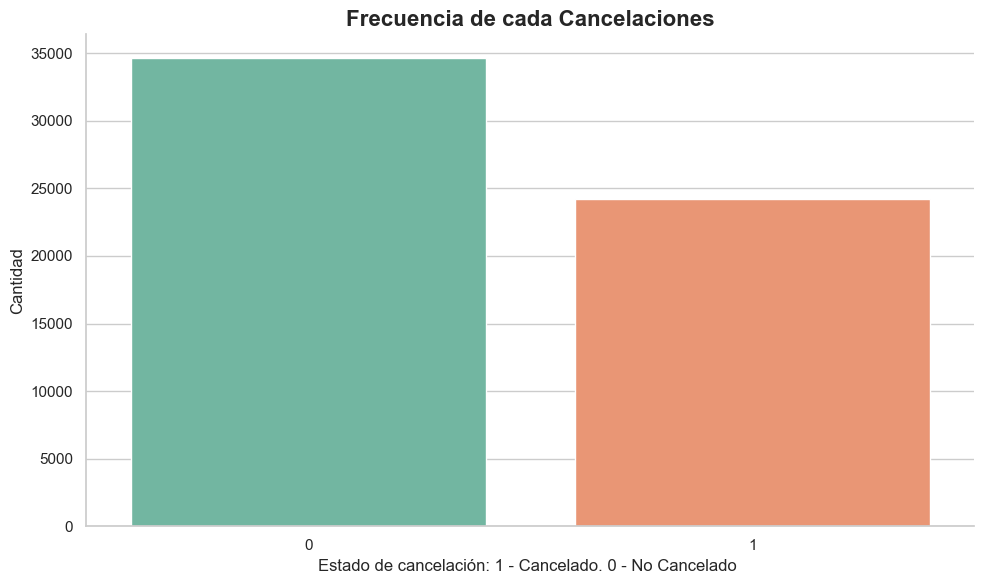

In [70]:
#Is_Canceled
hotels_df["is_canceled"].unique() # Only two values, same from dict. Data is clean in this column
hotels_df["is_canceled"].value_counts(dropna=False) 

# Estilo general
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 5)) 

# Paleta de colores
palette = sns.color_palette("pastel")

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")

# Contar frecuencia de los estados de reserva
hotel_counts = hotels_df['is_canceled'].value_counts().reset_index()
hotel_counts.columns = ['is_canceled', 'Frecuencia']

# Gráfico de barras
barplot = sns.barplot(
    x='is_canceled',
    y='Frecuencia',
    data=hotel_counts,
    palette = palette
    )
# Títulos y etiquetas
plt.title("Frecuencia de cada Cancelaciones", fontsize=16, weight='bold')
plt.xlabel("Estado de cancelación: 1 - Cancelado. 0 - No Cancelado ", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()


##### Variable 3: Lead Time

En el caso de la variable Lead Time, que nos dice el tiempo en días desde que se realizó la reserva hasta el día en el que inicia la reserva en el hotel,se encontró una desviación estandar considerblemente alta, cercana al promedio del conjunto de datos. Esta desviación estándar, además del hecho de que el 50% de las reservas se realizan en menos de 17 días y en más de 157 días, nos indican una elevada dispersión. Los clientes reservan con tiempo de anticipacion muy variados. 

Centrándose en el skewness y la kurtosis, al ser 1.21 y 1.01 respectivamente, se encuentra una cola larga hacia la derecha, con clientes que reservan con demasiada anticipación, debido a esto, la concentración en el centro es baja

In [71]:
#Caracterización de medidas de tendencia central
print('lead_time', '/',"Promedio:", hotels_df['lead_time'].mean().round(2))
print('lead_time', '/',"Mediana:", hotels_df['lead_time'].quantile(0.5).round(2))
print('lead_time', '/',"Q1:", hotels_df['lead_time'].quantile(0.25).round(2))
print('lead_time', '/',"Q3:", hotels_df['lead_time'].quantile(0.75).round(2))
print('lead_time', '/',"Desviación estándar:", hotels_df['lead_time'].std().round(2))
print('lead_time', '/',"Skewness:", hotels_df['lead_time'].skew().round(2))
print('lead_time', '/',"Kurtosis:", hotels_df['lead_time'].kurtosis().round(2))

lead_time / Promedio: 100.05
lead_time / Mediana: 69.0
lead_time / Q1: 17.0
lead_time / Q3: 157.0
lead_time / Desviación estándar: 101.16
lead_time / Skewness: 1.21
lead_time / Kurtosis: 1.01


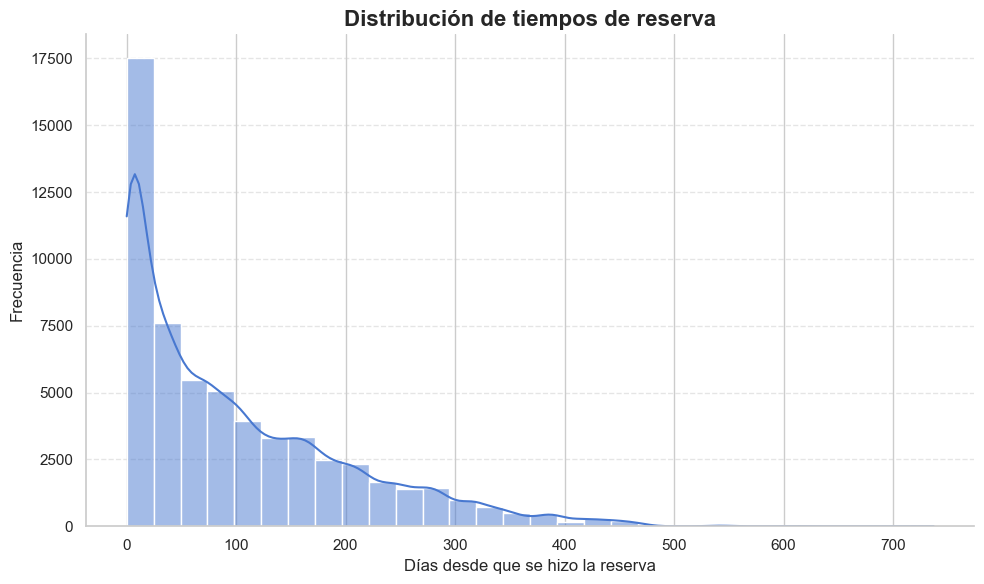

In [72]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=hotels_df,
    x='lead_time',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)

# Títulos y etiquetas
plt.title("Distribución de tiempos de reserva", fontsize=16, weight='bold')
plt.xlabel("Días desde que se hizo la reserva", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Variable 4: Guests

La variable guests se creo como la suma de adultos, niños y bebés de cada reserva, esta variable permite entender la cantidad total de huespedes incluidos en la reserva. Primero, se encontraron datos atípicos como adultos y bebés negativos (-1), por lo que se normalizó a 1 en el caso de los adultos y a 0 en el caso de los bebés

In [73]:
# Make negative adults equal to 1 (keep zeros unchanged) and then create the new variable
hotels_df['adults'] = hotels_df['adults'].apply(lambda x: 1 if x < 0 else x) # If there is no adults or negative, set to 1
hotels_df['babies'] = hotels_df['adults'].apply(lambda x: 0 if x < 0 else x) # If there is negative babies, set to 0 
hotels_df = hotels_df[hotels_df['babies']<=10]
#CREATE THE NEW COLUMN
hotels_df["guests"] =  hotels_df['adults']  +  hotels_df['babies'] +  hotels_df['children']

#Se revisan outliers
outlier_threshold  =  hotels_df["guests"].mean() + hotels_df["guests"].std()*15
# 97 outliers que deberia borrar
# Delete the outliers.
hotels_df = hotels_df[hotels_df["guests"] <= outlier_threshold]
hotels_df.shape

(58783, 34)

Analizando los valores de guests, se encontró que hay una fuerte concentración en el número de 4 peronas para las reservas realizadas. Esto se constata comparando con el promedio de 3.83 y mirando que el Q1 y Q3 son iguales, que son 4. el 50% de los datos tienen el mismo valor: 4. Filtrando la columna bebés para que solo tenga valores menores a 10, se encontró que la desviación estándar es baja, con valos muy cerca a 4. Asímismo, el Skewneess y la kurtosis respaldan una asimetría casi nula, con una pequeña menor concentración en el centro que una distribución normal

In [74]:
#Caracterización de medidas de tendencia central
print('Guests', '/',"Promedio:", hotels_df['guests'].mean().round(2))
print('Guests', '/',"Mediana:", hotels_df['guests'].quantile(0.5).round(2))
print('Guests', '/',"Q1:", hotels_df['guests'].quantile(0.25).round(2))
print('Guests', '/',"Q3:", hotels_df['guests'].quantile(0.75).round(2))
print('Guests', '/',"Desviación estándar:", hotels_df['guests'].std().round(2))
print('Guests', '/',"Skewness:", hotels_df['guests'].skew().round(2))
print('Guests', '/',"Kurtosis:", hotels_df['guests'].kurtosis().round(2))

Guests / Promedio: 3.82
Guests / Mediana: 4.0
Guests / Q1: 4.0
Guests / Q3: 4.0
Guests / Desviación estándar: 1.03
Guests / Skewness: -0.07
Guests / Kurtosis: 1.29


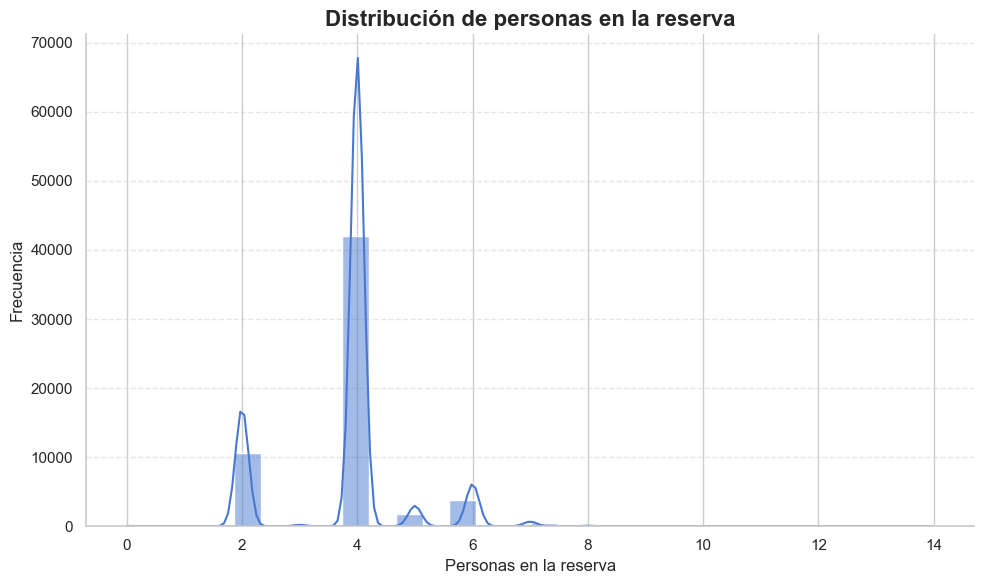

In [75]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=hotels_df,
    x='guests',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)
sns.histplot(data=hotels_df, x='guests', bins=30, stat='density', kde=True, color=palette[0], edgecolor='white')

# Títulos y etiquetas
plt.title("Distribución de personas en la reserva", fontsize=16, weight='bold')
plt.xlabel("Personas en la reserva", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Variable 5: ADR

En el caso de la variable ADR, que representa el costo promedio por noche de reserva, se encuentra una dispersión muy elevada que es reflejada por la desviación estandar. Adicionalmente, se encuentra que el 50% de los datos está entre 60 y 120, un rango amplio. Hay reservas con precios muy altos que distorisionan el análisis de la distribución.

In [76]:
#Caracterización de medidas de tendencia central
print('ADR', '/',"Promedio:", hotels_df['adr'].mean().round(2))
print('ADR', '/',"Mediana:", hotels_df['adr'].quantile(0.5).round(2))
print('ADR', '/',"Q1:", hotels_df['adr'].quantile(0.25).round(2))
print('ADR', '/',"Q3:", hotels_df['adr'].quantile(0.75).round(2))
print('ADR', '/',"Desviación estándar:", hotels_df['adr'].std().round(2))
print('ADR', '/',"Skewness:", hotels_df['adr'].skew().round(2))
print('ADR', '/',"Kurtosis:", hotels_df['adr'].kurtosis().round(2))

ADR / Promedio: 96.31
ADR / Mediana: 84.0
ADR / Q1: 60.0
ADR / Q3: 120.0
ADR / Desviación estándar: 58.56
ADR / Skewness: 13.62
ADR / Kurtosis: 1145.25


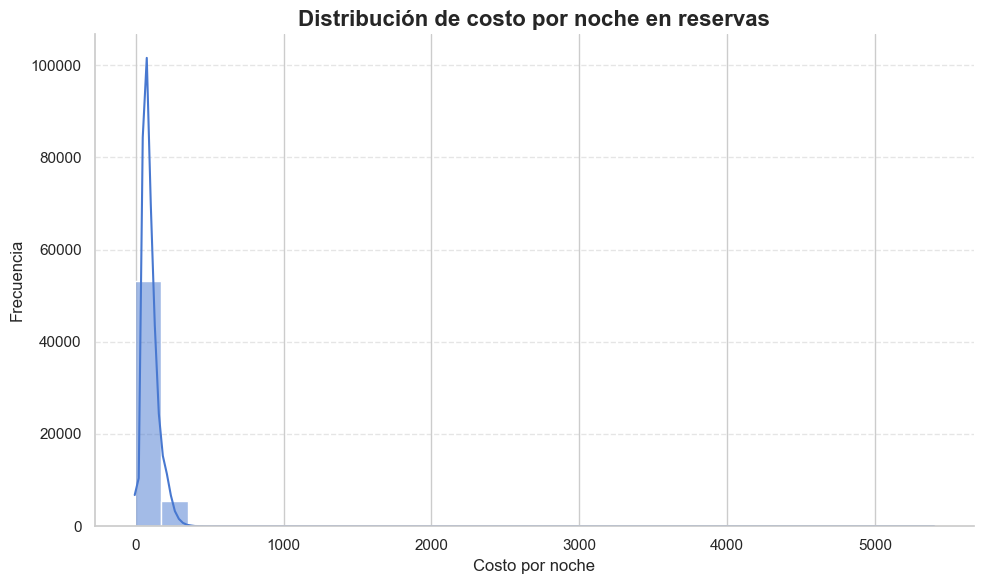

In [77]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=hotels_df,
    x='adr',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)

# Títulos y etiquetas
plt.title("Distribución de costo por noche en reservas", fontsize=16, weight='bold')
plt.xlabel("Costo por noche", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Segundo punto: Estrategia de datos

#### Descripción de la estrategia de datos

Se desarrollará una estrategia de datos cuyo primer paso es la limpieza de datos. En este sentido, para la limpiar los datos correspondientes del dataframe, se propone aplicar una eliminaciónd de outliers superiores a 1.5 el rango intercuartil para las columnas de valor númerico que se consideren pertinentes. En este sentido, y considerando que ya se realizó limpieza de outliers en la columna babies, las columnas seleccionadas para la eliminiación de outliers corresponden a:
- **Lead Time**
- **Stays in weekend nights**
- **Stays in week nights**
- **Adults**

Una vez se tenga un dataframe cuyos datos presenten medidas estadísticas favorables, se aplicarán pruebas de hipótesis de estadísitca inferencial que permitan conocer la relevancia estadística de ciertos parámetros en la posible cancelación o recurrencia de clientes en las reservas de hoteles.


### Tercer punto: Desarrollo de la estrategia

#### Limpieza de datos

Como se mencionó previamente, se realizará limpieza de datos considerando como outliers todos los datos que estén por encimad e 1.5 veces el rango intercuartil.

In [78]:
Columnas_Limpiar = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','adr']
df_Bookings_Clean = hotels_df
for row in Columnas_Limpiar:
    previo = df_Bookings_Clean.shape[0]
    q1 = hotels_df[row].quantile(0.25)
    q3 = hotels_df[row].quantile(0.75)
    iqr = q3-q1
    df_Bookings_Clean = df_Bookings_Clean.loc[df_Bookings_Clean[row] <= (q3 + 1.5 * iqr)]
    print ('De la columna ',row, '  se eliminaron ',df_Bookings_Clean.shape[0]-previo,'datos, dejando',df_Bookings_Clean.shape[0], 'datos validos')
Diferencia = hotels_df.shape[0]- df_Bookings_Clean.shape[0]
print('Se eliminaron en total ', Diferencia, 'registros')

De la columna  lead_time   se eliminaron  -1230 datos, dejando 57553 datos validos
De la columna  stays_in_weekend_nights   se eliminaron  -210 datos, dejando 57343 datos validos
De la columna  stays_in_week_nights   se eliminaron  -1193 datos, dejando 56150 datos validos
De la columna  adults   se eliminaron  -2219 datos, dejando 53931 datos validos
De la columna  adr   se eliminaron  -2274 datos, dejando 51657 datos validos
Se eliminaron en total  7126 registros


Para tener un alcance de la limpieza al dataset que se realizó, a continuación se presentan los mismos histogramas que se presentaron en el punto 1, pero esta vez utilizando el dataset depurado

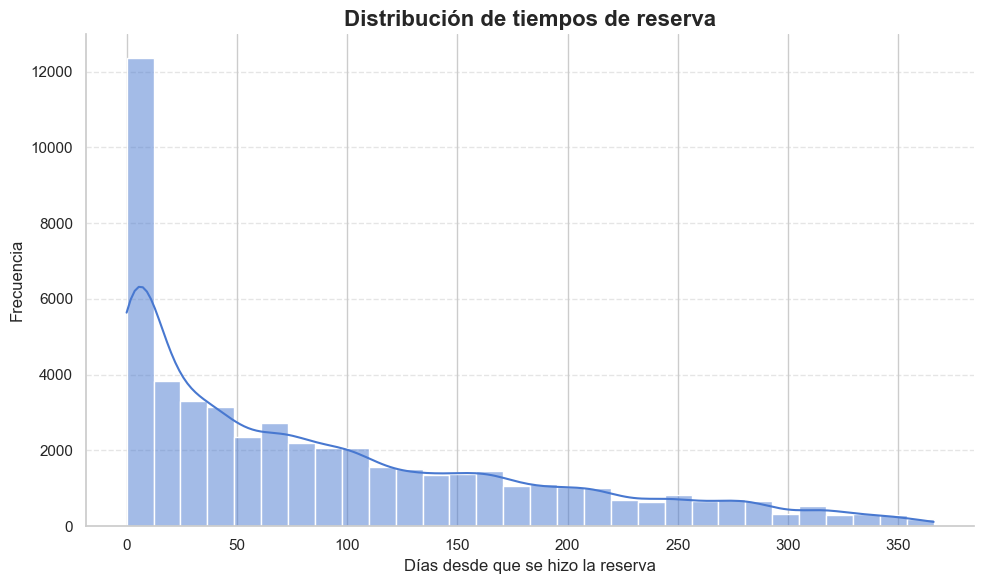

In [79]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=df_Bookings_Clean,
    x='lead_time',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)

# Títulos y etiquetas
plt.title("Distribución de tiempos de reserva", fontsize=16, weight='bold')
plt.xlabel("Días desde que se hizo la reserva", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

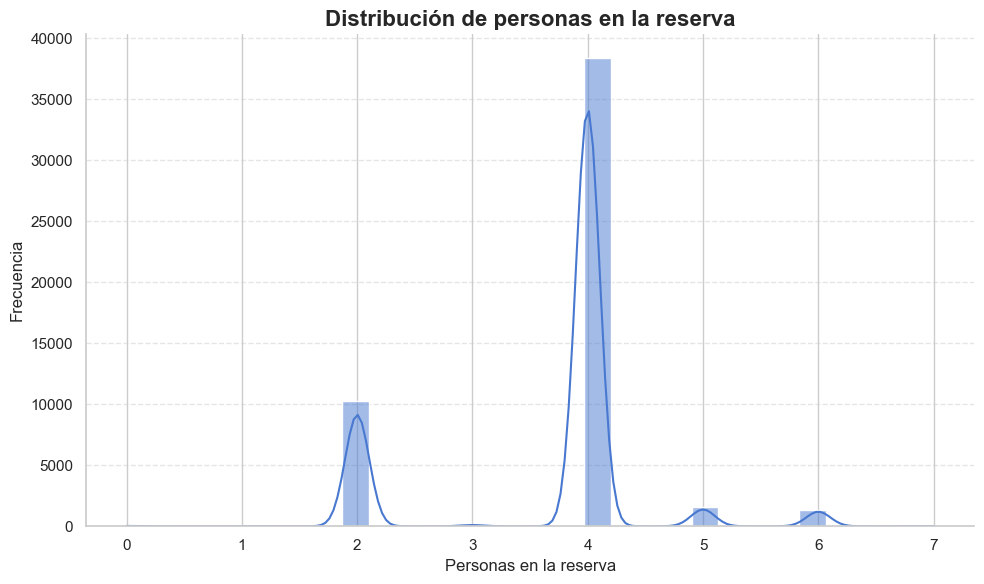

In [80]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=df_Bookings_Clean,
    x='guests',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)

# Títulos y etiquetas
plt.title("Distribución de personas en la reserva", fontsize=16, weight='bold')
plt.xlabel("Personas en la reserva", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

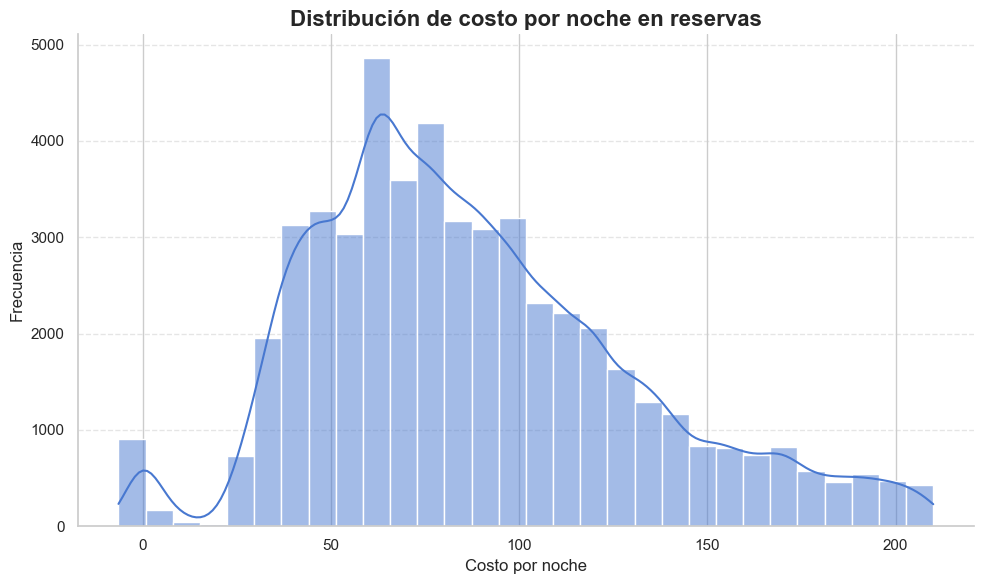

In [81]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("muted")

sns.histplot(
    data=df_Bookings_Clean,
    x='adr',
    bins=30,
    kde=True,
    color=palette[0],
    edgecolor='white'
)

# Títulos y etiquetas
plt.title("Distribución de costo por noche en reservas", fontsize=16, weight='bold')
plt.xlabel("Costo por noche", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Análisis multivariado

Se inicia analizando la variable is_canceled, revisando diferencias en las descripciones de valores numéricos al analizar de manera agrupada frente a las variables adr, booked_days, guests y lead_time.

La variable booked_days es una variable creada para efectos de este análisis, en la que se suman los dias agendados entre días de semana y fines de semana

In [82]:
#Creación de la variable booked_days
df_Bookings_Clean["booked_days"] =  df_Bookings_Clean["stays_in_week_nights"] + df_Bookings_Clean["stays_in_weekend_nights"]
# Numeric vs binary: describe selected numeric columns by cancellation status
cols = ['adr', 'booked_days', 'guests','lead_time']

# Descriptive stats by is_canceled (0 = not canceled, 1 = canceled)
desc_by_cancel = df_Bookings_Clean.groupby('is_canceled')[cols].describe().round(2)
desc_by_cancel

adr                                             booked_days  \
               count  mean   std   min   25%   50%    75%    max       count   
is_canceled                                                                    
0           30904.00 81.28 43.05 -6.38 50.00 72.25 103.18 210.00    30904.00   
1           20753.00 97.64 40.12  0.00 68.00 94.50 120.00 210.00    20753.00   

                                                  guests                      \
            mean  std  min  25%  50%  75%   max    count mean  std  min  25%   
is_canceled                                                                    
0           3.58 2.46 0.00 2.00 3.00 5.00 12.00 30904.00 3.62 0.94 0.00 4.00   
1           3.56 2.12 0.00 2.00 3.00 5.00 12.00 20753.00 3.77 0.88 0.00 4.00   

                           lead_time                                       \
             50%  75%  max     count   mean   std  min   25%   50%    75%   
is_canceled                                                                 
0           4.00 4.00 7.00  30904.00  74.47 85.91 0.00  5.00 39.00 120.00   
1           4.00 4.00 7.00  20753.00 119.27 92.30 0.00 41.00 98.00 182.00   

                    
               max  
is_canceled         
0           366.00  
1           365.00

##### ADR vs Cancelación

Estudiando las gráficas, se encuentra que las reservas que tienen un mayor costo se encuentran más propensas a cancelar

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\2021680861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_Bookings_Clean, x='is_canceled',palette=palette, y='adr', order=[0, 1], showfliers=True, showmeans=True)
C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\2021680861.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No canceló', 'Sí canceló'])


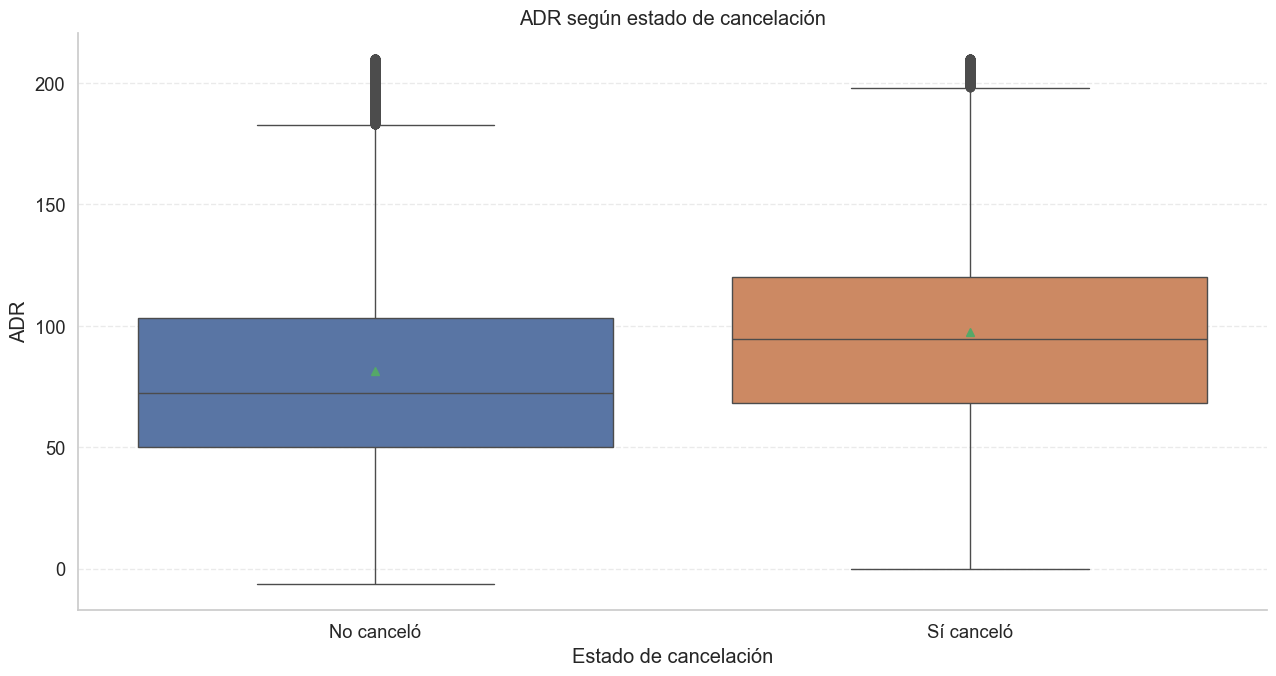

In [83]:
# Estilo general
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(13, 7))
palette = {'0': '#4C72B0', '1': '#DD8452'} 

ax = sns.boxplot(data=df_Bookings_Clean, x='is_canceled',palette=palette, y='adr', order=[0, 1], showfliers=True, showmeans=True)
ax.set(title='ADR según estado de cancelación', xlabel='Estado de cancelación', ylabel='ADR')
ax.set_xticklabels(['No canceló', 'Sí canceló'])


sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### Lead Time vs Cancelación

Estudiando el lead time frente a cancelación, se encontró que las reservas que fueron canceladas presentaban un lead time notablemente mayor. En este sentido, **es oportuno implementar una estrategia de retenciónd e clientes con un leadtime mayor a la mediana**

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\3907816132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_Bookings_Clean, x='is_canceled',palette=palette, y='lead_time', order=[0, 1], showfliers=True, showmeans=True)
C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\3907816132.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No canceló', 'Sí canceló'])


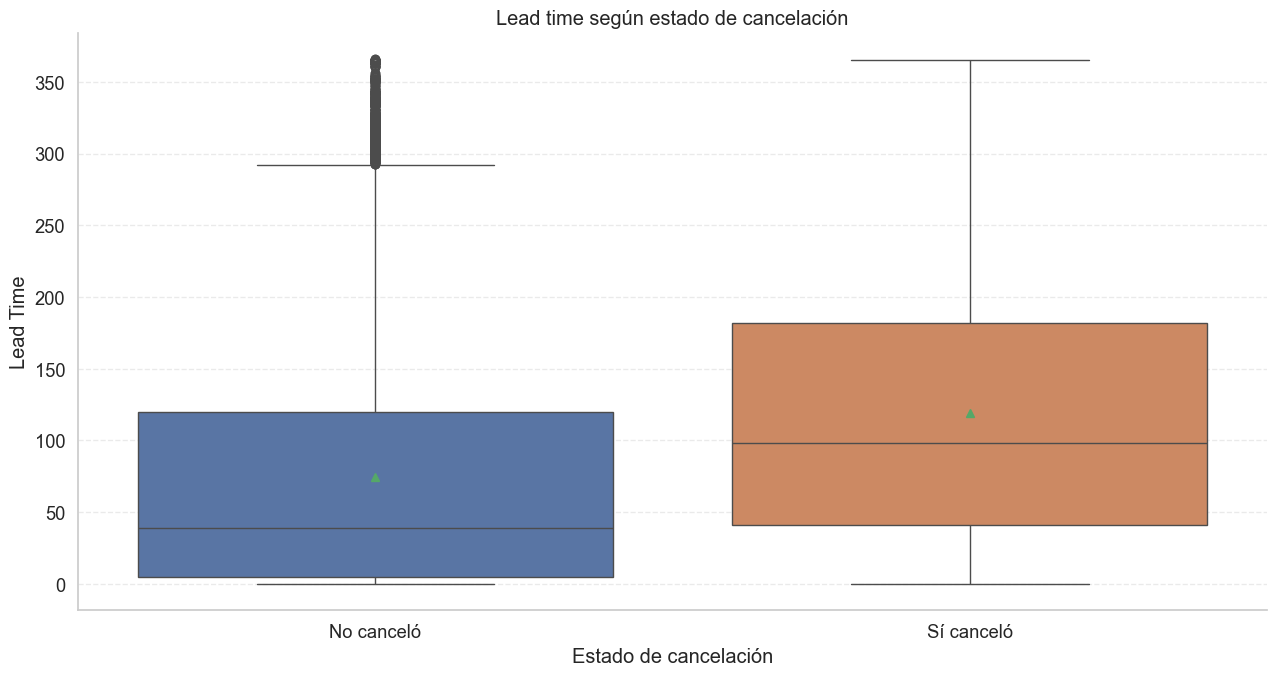

In [84]:
# Estilo general
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(13, 7))
palette = {'0': '#4C72B0', '1': '#DD8452'} 

ax = sns.boxplot(data=df_Bookings_Clean, x='is_canceled',palette=palette, y='lead_time', order=[0, 1], showfliers=True, showmeans=True)
ax.set(title='Lead time según estado de cancelación', xlabel='Estado de cancelación', ylabel='Lead Time')
ax.set_xticklabels(['No canceló', 'Sí canceló'])


sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### ADR vs Tipo de Hotel
Se encuentra un mayor rando intercuartil en el Resort Hotel, lo que significa que tiene una mayor dispersión en sus valores frente a City hotel, el cual tiene una menor variación y una mediana mayor. En general, el City Hotel cuenta con valores de ADR más elevados, así comouna mayor presencia de outliers

C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\3828552347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_Bookings_Clean, x='hotel',palette=palette, y='adr',order=['Resort Hotel','City Hotel'],showfliers=True, showmeans=True)
C:\Users\palsan05\AppData\Local\Temp\ipykernel_28496\3828552347.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Resort Hotel', 'City Hotel'])


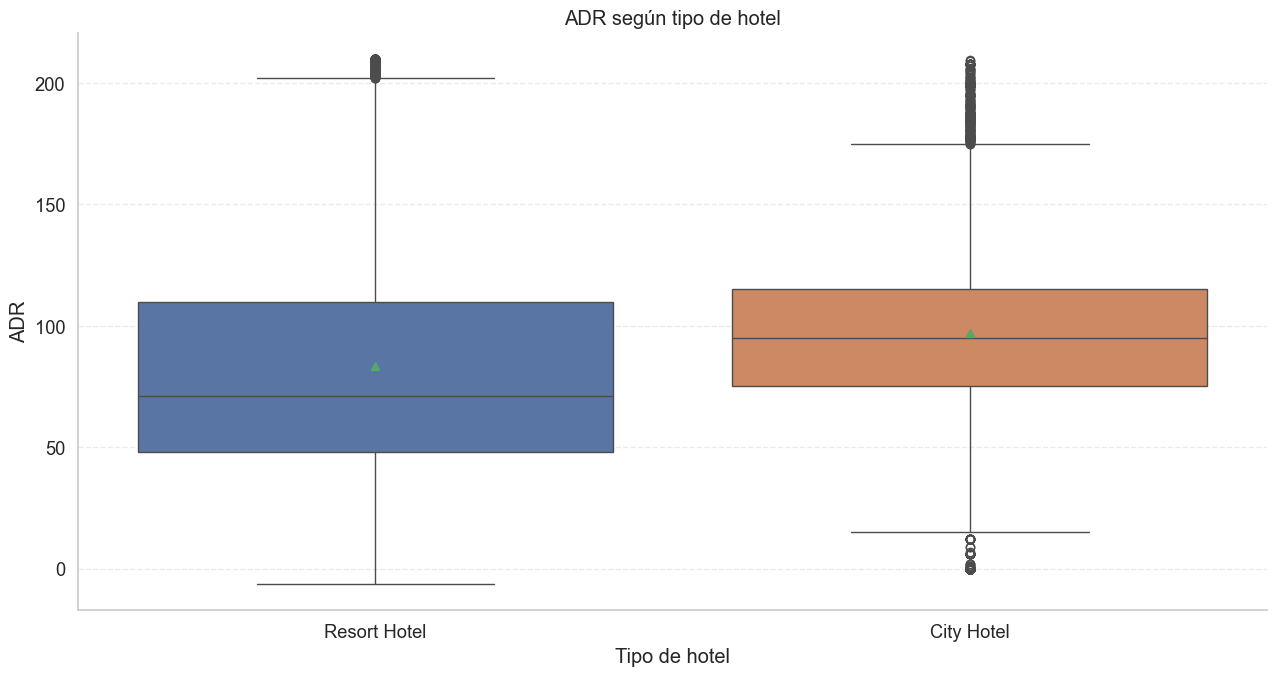

In [85]:
# Estilo general
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(13, 7))
palette = {'Resort Hotel': '#4C72B0', 'City Hotel': '#DD8452'} 

ax = sns.boxplot(data=df_Bookings_Clean, x='hotel',palette=palette, y='adr',order=['Resort Hotel','City Hotel'],showfliers=True, showmeans=True)
ax.set(title='ADR según tipo de hotel', xlabel='Tipo de hotel', ylabel='ADR')
ax.set_xticklabels(['Resort Hotel', 'City Hotel'])


sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Prueba de hipótesis con estadística inferencial

##### Hipótesis 1: No importa el tipo de hotel en si una reserva es cancelada o no

Debido a que esta es una hipótesis que utiliza dos variables categóricas, se utiliza Chi Cuadrado en la prueba de estadística inferencial.

In [86]:
contingency_table = pd.crosstab(index=df_Bookings_Clean['hotel'], columns=df_Bookings_Clean['is_canceled'])
contingency_table
alpha = 0.05
chi2, pvalue, _, expected = chi2_contingency(contingency_table, correction=False)

In [87]:
n = contingency_table.values.sum()
r, k = contingency_table.shape

phi2 = chi2 / n
phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
r_corr = r - ((r - 1) ** 2) / (n - 1)
k_corr = k - ((k - 1) ** 2) / (n - 1)

cramers_v = np.sqrt(phi2_corr / max(1e-12, min(r_corr - 1, k_corr - 1))) # Cramér's V, bias corrected

In [88]:
print(f"chi-square: {chi2:.4f}")
print(f"p-value:    {pvalue:.4g}")
print(f"Cramér's V: {cramers_v:.3f}")

chi-square: 7891.2012
p-value:    0
Cramér's V: 0.391


In [89]:
if pvalue <= alpha:
    print("Rechazo de la hipótesis nula: Hay una correlación entre el tipo de hotel y la tendencia a cancelar.")
else:
    print("No se puede rechazar la hipótesis nula:")

Rechazo de la hipótesis nula: Hay una correlación entre el tipo de hotel y la tendencia a cancelar.


In [90]:
reference = [0.1, 0.3, 0.5]
magnitude = min(reference, key=lambda r: abs(r - cramers_v))

match magnitude:
    case 0.1:
        print("El tamaño del efecto es pequeño.")
    case 0.3:
        print("El tamaño del efecto es moderado.")
    case 0.5:
        print("El tamaño del efecto es grande.")

El tamaño del efecto es moderado.


##### Hipótesis 2: El tipo de hotel no influye directamente en el precio que se paga

Debido a que se utilizan variables cuantitativas, se implementa el t-test

In [91]:
hoteles = df_Bookings_Clean['hotel'].unique()
a = df_Bookings_Clean.loc[df_Bookings_Clean['hotel'] == hoteles[0], 'adr']
b = df_Bookings_Clean.loc[df_Bookings_Clean['hotel'] == hoteles[1], 'adr']
# Welch’s two-sample t-test
result= ttest_ind(a, b, equal_var=False)
ci = result.confidence_interval(alpha) # 99% CI for (mean_a - mean_b)
n1, n2 = len(a), len(b)
m1, m2 = a.mean(), b.mean()
s1, s2 = a.std(), b.std()

sp = np.sqrt(((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2)) # Pooled SD
d = (m1 - m2) / sp # Cohen's d

df_pooled = n1 + n2 - 2
J = 1 - 3 / (4 * df_pooled - 1)
g = J * d # Hedges' g (bias-corrected d), particularly important when sample sizes are smal

In [92]:
print(f"t-statistic: {result.statistic:.4f}")
print(f"p-value:     {result.pvalue:.4g}")
print(f"IC99%:       [{ci.low:.3f}, {ci.high:.3f}]")

print(f"Cohen's d:  {d:.3f}")
print(f"Hedges' g:  {g:.3f}")

t-statistic: -40.0016
p-value:     0
IC99%:       [-13.860, -13.817]
Cohen's d:  -0.328
Hedges' g:  -0.328


In [93]:
if result.pvalue <= alpha:
    print(f"Rechazo de la hipótesis nula: La diferencia de precios entre {hoteles[0]} y {hoteles[1]} es estadísticamente significativa")
else:
    print("No se puede rechazar la hipótesis nula")


if result.statistic > 0 :
    print(f"La media en el grupo A es mayor, es decir, Los Resort Hotel estan relacionadas a valores de ADR mas altos")
else:
    print(f"La media en el grupo B es mayor, decir, Los City Hotels estan relacionadas a valores de ADR mas altos")

Rechazo de la hipótesis nula: La diferencia de precios entre Resort Hotel y City Hotel es estadísticamente significativa
La media en el grupo B es mayor, decir, Los City Hotels estan relacionadas a valores de ADR mas altos


##### Hipótesis 3: La cancelación se ve afectada por el ADR

De igual manera, al tratarse de una variable binaria frente a una variable numérica, se implementa t-test

In [94]:
# Define the alpha. Significancia estadistica aka porcentaje de confianza. Normalmente entre 5% y 1%
alpha = 0.05
#Definir las variables cat, vs el numerico
a = df_Bookings_Clean.loc[df_Bookings_Clean["is_canceled"] == 0, "adr"] # No Cancelado
b = df_Bookings_Clean.loc[df_Bookings_Clean["is_canceled"] == 1, "adr"] # Cancelado

# Welch’s two-sample t-test
result= ttest_ind(a, b, equal_var=False)
#ESTO ES LA DECLARACION DEL T TEST

#Intervalo de confianza con un minimo y un maximo. Normalmente va a ser 0.025 a cada lado. 
ci = result.confidence_interval(alpha) # 99% CI for (mean_a - mean_b)

In [95]:
n1, n2 = len(a), len(b)
m1, m2 = a.mean(), b.mean()
s1, s2 = a.std(), b.std()

sp = np.sqrt(((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2)) # Pooled SD
d = (m1 - m2) / sp # Cohen's d  

df_pooled = n1 + n2 - 2
J = 1 - 3 / (4 * df_pooled - 1)
g = J * d # Hedges' g (bias-corrected d), particularly important when sample sizes are small


#RESULTS
print(f"t-statistic: {result.statistic:.4f}") # IF POSITIVE, THEN A mean is bigger than B mean
print(f"p-value:     {result.pvalue:.4g}")  # IF BELOW ALPHA, THEN  WE CAN REFUTE H0
print(f"IC99%:       [{ci.low:.3f}, {ci.high:.3f}]") # Intervalo de confianza.  
print(f"Cohen's d:  {d:.3f}")
print(f"Hedges' g:  {g:.3f}")

t-statistic: -44.1329
p-value:     0
IC99%:       [-16.389, -16.343]
Cohen's d:  -0.391
Hedges' g:  -0.391


In [96]:
if result.pvalue <= alpha:
    print(f"Rechazo de la hipótesis nula: La diferencia de precio entre A (NO CANCELADO) y B (CANCELADO) es estadísticamente significativa.")
else:
    print(f"No se puede rechazar la hipótesis nula")


if result.statistic > 0 :
    print(f"La media en el grupo A es mayor, es decir, Las NO cancelaciones suelen estar relacionadas a valores de ADR mas altos")
else:
    print(f"La media en el grupo B es mayor, decir, Las Cancelaciones suelen estar relacionadas a valores de ADR mas altos")

Rechazo de la hipótesis nula: La diferencia de precio entre A (NO CANCELADO) y B (CANCELADO) es estadísticamente significativa.
La media en el grupo B es mayor, decir, Las Cancelaciones suelen estar relacionadas a valores de ADR mas altos




# Informe ejecutivo (resumen)

Tras el análisis del dataset de hoteles (City y Resort) y sus reservas, identificamos patrones clave relacionados con el número de huéspedes por reserva, el ADR (Average Daily Rate) y la propensión a cancelar. A partir de estos hallazgos proponemos un conjunto de estrategias accionables para aumentar ocupación, optimizar ADR y reducir cancelaciones

1. **Promociones por tamaño de grupo**  
   Implementar ofertas dirigidas a reservas de 1, 3, 5 y 7 huéspedes, como por ejemplo: _"quinto huésped 50%"_, _"Trae a dos amigos, 3 personas con 15% off"_. Esto para incentivar combinaciones poco frecuentes, pero fácilmente logrables, y así aumentar la ocupación promedio por reserva.

2. **Retención en reservas de ADR alto**  
    Los datos demuestran que las cancelaciones están asociadas a reservas de mayor ADR. Se recomiendan estrategias para reducir las cancelaciones donde hay mayor impacto económico. Acciones como depósitos parciales o reservaciones no reembolsables y ofertas de retención hacer un upgrade de habitación.

3. **Aumentar ADR en resorts con upsells**  
   El análisis confirma que los City Hotels tienen valores de ADR mas altos. Se recomiendan estrategias para incrementar el ADR de los Resort Hotels ofreciendo servicios adicionales (SPA, actividades, paquetes experiencia) como upsell durante el proceso de reserva.

4. **Reducir cancelaciones según tipo de hotel** 
   Se encontró una correlación entre el tipo de hotel y la tendencia a cancelar una reservación. Estrategias para evitar la cancelación son recomendadas de acuerdo a las condiciones de cada hotel. Por ejemplo se recomienda upgrades de habitación como un ejemplo para City Hotel o sesiones gratuitas en los spas de los Resort Hotels


**Conclusión** 
 Las medidas propuestas combinan tácticas comerciales (promociones por tamaño de grupo, upsells) con mejoras operativas (depósitos parciales) para reducir cancelaciones y mejorar ADR/ocupación. Recomendamos empezar por las estrategias más fáciles  de aplicar y continuar analizando los datos y los resultados para generar mejores estrategias. 
